# Predicting the prices of Avacados

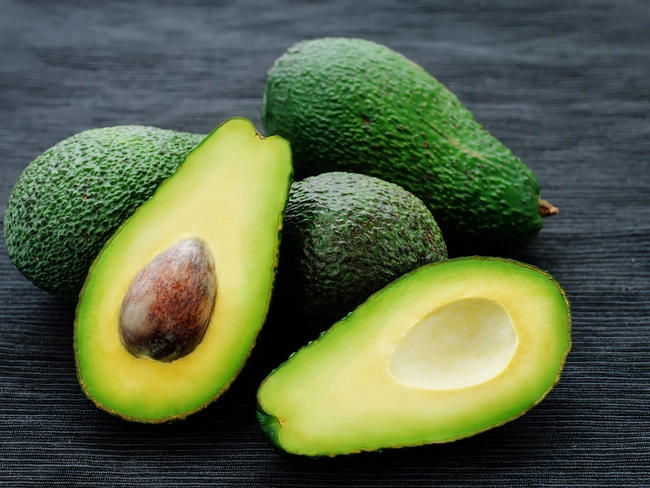

In [18]:
# diaplay image using python
from IPython.display import Image
url = 'https://img.etimg.com/thumb/msid-71806721,width-650,imgsize-807917,,resizemode-4,quality-100/avocados.jpg'
Image(url,height=300,width=400)

In [19]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')


In [20]:
data = pd.read_csv("avacado1.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [21]:
# avocado = data.drop("Unnamed: 0", axis=1)

In [22]:
# avocado.to_csv("avacado1.csv", index=False)

In [23]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


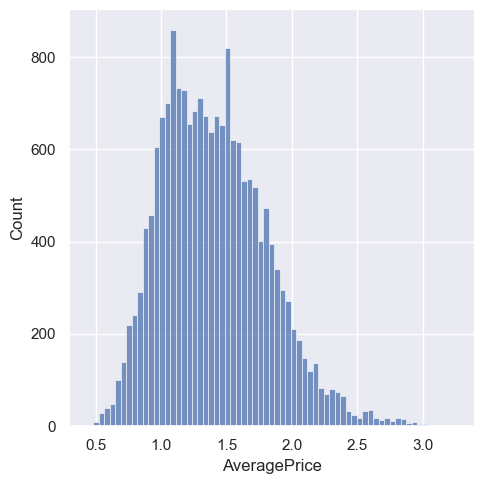

In [24]:
sns.displot(data['AveragePrice']);

<Axes: xlabel='year', ylabel='count'>

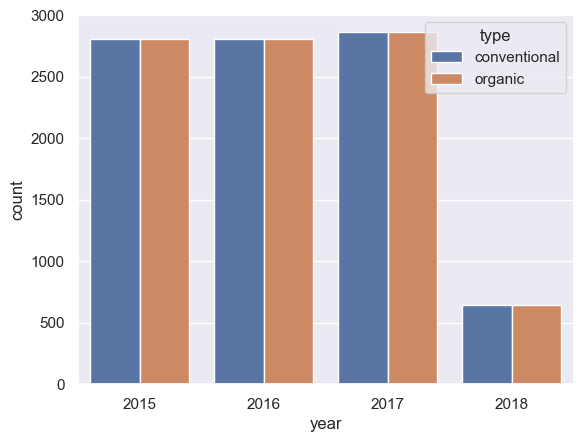

In [25]:
sns.countplot(x='year',data=data, hue='type')

In [26]:
data.year.value_counts()

year
2017    5722
2016    5616
2015    5615
2018    1296
Name: count, dtype: int64

<Axes: xlabel='AveragePrice', ylabel='type'>

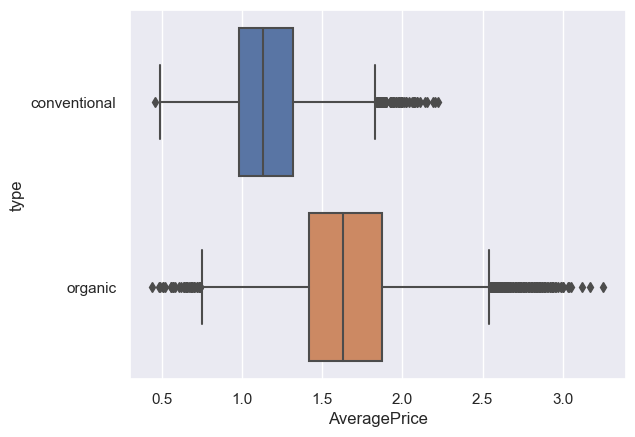

In [27]:
sns.boxplot(y="type", x="AveragePrice", data=data)

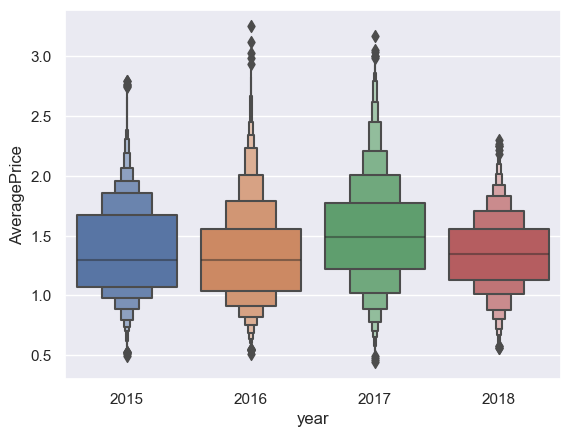

In [28]:
data.year = data.year.apply(str)
sns.boxenplot(x="year", y="AveragePrice", data=data);

# Dealing with categorical features

In [29]:
data['type'] = data['type'].map({'conventional':0,'organic':1})

# Extracting month from date column.
data.Date = data.Date.apply(pd.to_datetime)
data['Month'] = data['Date'].apply(lambda x:x.month)
data.drop('Date',axis=1,inplace=True)
data.Month = data.Month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY', 6:'JUNE', 7:'JULY', 8:'AUG', 9:'SEPT', 10:'OCT', 11: 'NOV' ,12: 'DEC'})

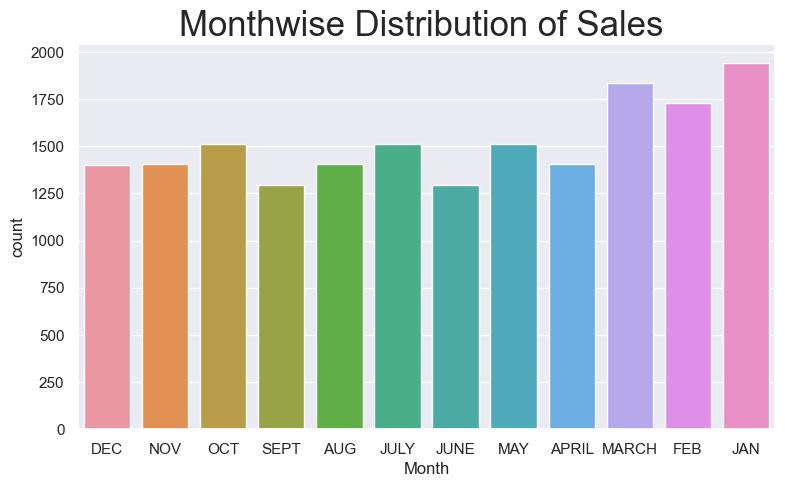

In [30]:
plt.figure(figsize=(9,5))
sns.countplot(x='Month', data=data)
plt.title('Monthwise Distribution of Sales ', fontdict={'fontsize':25});

# Preparing data for ML Models

In [31]:
# Creating dummy variables
dummies = pd.get_dummies(data[['year','region','Month']],drop_first=True)
df_dummies = pd.concat([data[['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type']],dummies],axis=1)
target = data['AveragePrice']

In [34]:
# Splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies,target,test_size=0.30)

In [35]:
# Standardizing the data
cols_to_std = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train[cols_to_std])
X_train[cols_to_std] = scaler.transform(X_train[cols_to_std])
X_test[cols_to_std] = scaler.transform(X_test[cols_to_std])

In [38]:
#importing ML models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
# pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/99/19/e2544328cb7be70d7f73a7660ecce3a63b40282ff1a344c44c2faeef9586/xgboost-3.0.4-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ----------------------

In [39]:
#to save time all models can be applied once using for loop
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(gamma=1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    'XGBoost' : XGBRegressor()
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.round(r2_score(y_test,pred),3)
                         ]

# Deep Neural Network

In [40]:
# Splitting train set into training and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.20)

#importing tensorflow libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#creating model
model = Sequential()
model.add(Dense(76,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)

In [44]:
import numpy as np

X_train = np.asarray(X_train, dtype=np.float32)
X_val   = np.asarray(X_val, dtype=np.float32)
y_train = np.asarray(y_train, dtype=np.float32)  # or int32 if classification
y_val   = np.asarray(y_val, dtype=np.float32)


In [45]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=100,
    epochs=150,
    callbacks=[early_stop]
)


Epoch 1/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.6177 - val_loss: 0.0647
Epoch 2/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1187 - val_loss: 0.0631
Epoch 3/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0968 - val_loss: 0.0577
Epoch 4/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0849 - val_loss: 0.0550
Epoch 5/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0750 - val_loss: 0.0404
Epoch 6/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0686 - val_loss: 0.0396
Epoch 7/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0664 - val_loss: 0.0342
Epoch 8/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0608 - val_loss: 0.0333
Epoch 9/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0563 - val_loss: 0.0341
Epoch 10/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0552 - val_loss: 0.0323
Epoch 11/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0517 - val_loss: 0.0329
Epoch 12/150
103/103 ━━━━━━━━━━━━━━━━━━━━

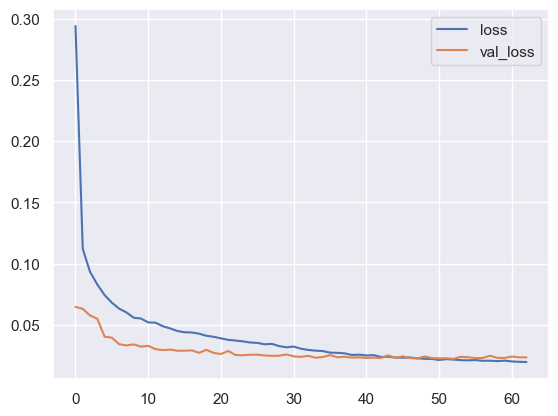

In [46]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot();

In [48]:
X_test = np.asarray(X_test, dtype=np.float32)   # ensure numeric tensor
dnn_pred = model.predict(X_test)


172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


# Results Table

In [49]:
results.loc['Deep Neural Network']=[mean_absolute_error(y_test,dnn_pred).round(3),mean_squared_error(y_test,dnn_pred).round(3),
                                    r2_score(y_test,dnn_pred).round(3)]
results

,MAE,MSE,R2-score
Linear Regression,0.184,0.060,0.635
Decision Tree,0.130,0.040,0.755
Random Forest,0.097,0.020,0.879
Support Vector Machines,0.118,0.028,0.830
K-nearest Neighbors,0.100,0.024,0.855
XGBoost,0.094,0.017,0.898
Deep Neural Network,0.115,0.025,0.846


In [50]:
f"10% of mean of target variable is {np.round(0.1 * data.AveragePrice.mean(),3)}"

'10% of mean of target variable is 0.141'

In [51]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Greens',subset=['R2-score'])

,MAE,MSE,R2-score
XGBoost,0.094000,0.017000,0.898000
Random Forest,0.097000,0.020000,0.879000
K-nearest Neighbors,0.100000,0.024000,0.855000
Deep Neural Network,0.115000,0.025000,0.846000
Support Vector Machines,0.118000,0.028000,0.830000
Decision Tree,0.130000,0.040000,0.755000
Linear Regression,0.184000,0.060000,0.635000


## Conclusion:

* Except linear regression model, all other models have mean absolute error less than 10% of mean of target variable.
* For this dataset, XGBoost and Random Forest algorithms have shown best results.